# Stability of the Lyaponov Orbit
## Given
Earth-Moon system with at $L_1$ a perturbation of $\xi = 0.025$ and $\eta = 0$

## Find
a) Use the STM perpendicular crossing. Algorithm should be 3D. Compute orbit, plot it.

b) Accuracy of the end conditons. How long can you propogate?

c) Compute 6 eigenvalue. What types of eigenvalues? Six real? 4 complex and 2 real?

d) Identify and colour the orbit baased on the eigenvalues. 

In [1]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import tqdm as tq


In [2]:
system = "Earth-Moon"
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)

xi_0 = 0.025
eta_0   = 0
zeta_0  = 0 

U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L1, 0, 0, SS3.loc[system,'miu']) 

beta_1  = 2 - (U_xx + U_yy)/2
beta_2  = np.sqrt(-U_xx*U_yy)
s       = np.sqrt(beta_1 + np.sqrt(beta_1**2 + beta_2**2))
beta_3  = (s**2 + U_xx)/2/s

xi_dot_0    = eta_0*s/beta_3
eta_dot_0   = -beta_3*xi_0*s
zeta_dot_0  = 0

t_span = [0, np.pi/2]
IC = np.append([L1+xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 

target = {'x_dot_f': 0, 'y_f':0}
changeable = ('y_dot_0')

### Part a)

Text(0.5, 1.0, 'Two periods of the Periodic orbit around L_1')

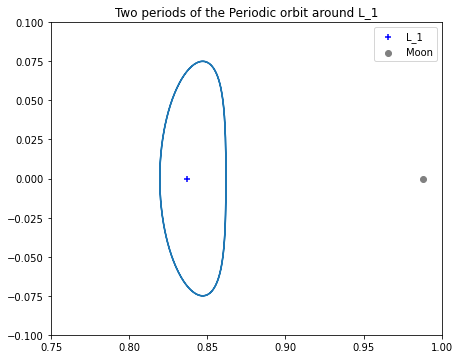

In [3]:
IC_per, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable,attempts=10)


t_span =[0, tf_per*4]

traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC_per[:6], method='RK45',
                      rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(figsize= (7,7))
axs.plot(traj_perd.y[0,:], traj_perd.y[1,:])
axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.1, .1])
axs.set_xlim([.75, 1])
axs.set_aspect('equal', 'box')
axs.set_title('Two periods of the Periodic orbit around L_1')

### Part b)

The error after 2 revolutions:  [-4.89874863e-09  3.83366462e-09  0.00000000e+00 -1.67887000e-08
  9.09624095e-09  0.00000000e+00]


Text(0.5, 1.0, 'Four periods of the Periodic orbit around L_1')

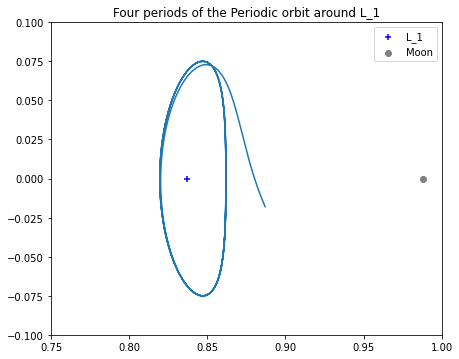

In [4]:
error = traj_perd.y[:6,0] - traj_perd.y[:6,-1]
print("The error after 2 revolutions: ", error)

t_span =[0, tf_per*8]

traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC_per[:6], method='RK45',
                      rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(figsize= (7,7))
axs.plot(traj_perd.y[0,:], traj_perd.y[1,:])
axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.legend()
axs.set_ylim([-.1, .1])
axs.set_xlim([.75, 1])
axs.set_aspect('equal', 'box')
axs.set_title('Four periods of the Periodic orbit around L_1')

### Part c)

In [5]:
t_span =[0, tf_per*2]
IC = np.append(IC, np.eye(6).reshape(36,))
traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45',
                      rtol=10**-12, atol=10**-16)

eig_val, _ = np.linalg.eig(traj_perd.y[6:,-1].reshape(6,6))
print(eig_val)


[ 6.74392325e+01+0.j         -2.17170791e+00+0.j
  1.48281640e-02+0.j         -4.60467081e-01+0.j
  9.64297321e-01+0.26482197j  9.64297321e-01-0.26482197j]


### Part d)

100%|██████████| 25/25 [00:59<00:00,  2.37s/it]


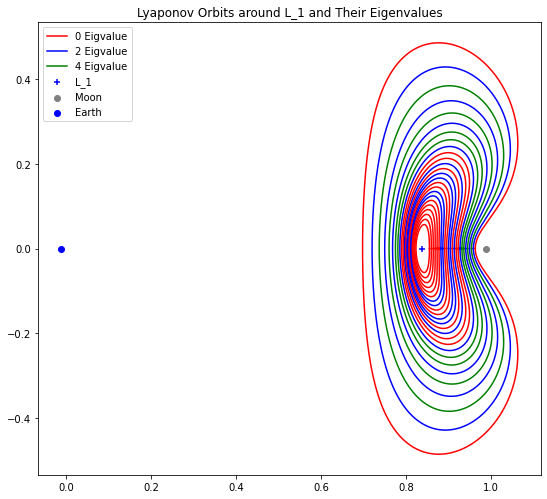

In [6]:
n = 25

x_0_vec = np.array([0.847, 0.8505])
y_dot_0_vec = np.array([-.08, -0.103])
Per_vec = np.array([3.1835, 3.180])
J_c_vec = np.zeros((n,))
eig_val_vec = np.zeros((6,n), dtype=complex)
type_orbit = {0:['red', '0 Eigvalue'], 2:['blue', '2 Eigvalue'], 4:['green', '4 Eigvalue']}

step = 0.0045

fig, axs = plt.subplots(figsize= (9,9))

for i in tq.tqdm(range(n)):
    # Guesser
    x0 = x_0_vec[-1] + step
    
    grad = (y_dot_0_vec[-1] - y_dot_0_vec[-2])/(x_0_vec[-1] - x_0_vec[-2])
    intercept = y_dot_0_vec[-1] - grad*x_0_vec[-1]
    y_dot_0 = x0 *grad + intercept
    IC = np.array([x0, 0, 0, 0, y_dot_0, 0])
    
    grad = (Per_vec[-1] - Per_vec[-2])/(x_0_vec[-1] - x_0_vec[-2])
    intercept = Per_vec[-1] - grad*x_0_vec[-1]
    tf = x0 *grad + intercept
    t_span = np.array([0, tf/2])
    
    # Find the new orbit
    # fig, axs = plt.subplots(figsize= (7,7))
    IC, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=10)
    
    t_span = [0, 2*tf_per] 
    # Plot the new orbit
    traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45',
                      rtol=10**-12, atol=10**-16)

    IC = IC[:6]
    
    # Eigenvalues
    eig_val, _ = np.linalg.eig(traj_perd.y[6:,-1].reshape(6,6))
    eig_val_vec[:,i] = eig_val
    
    # Colour based on Eigenvalues
    orbit_color = type_orbit[sum(np.iscomplex(eig_val))][0]
    orbit_label = type_orbit[sum(np.iscomplex(eig_val))][1]
    
    # Log some values
    y_dot_0_vec = np.append(y_dot_0_vec, IC[4])
    x_0_vec = np.append(x_0_vec, IC[0])
    Per_vec = np.append(Per_vec, t_span[-1])
    J_c_vec[i] = pn.Jacobi_const(*IC[:3], v=np.linalg.norm(IC[3:6]), miu=SS3.loc[system,'miu'])
    
    
    
    axs.plot(traj_perd.y[0,:], traj_perd.y[1,:], color = orbit_color, label=orbit_label)

axs.scatter(L1,0, marker = '+', color='blue', label='L_1')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.scatter(-SS3.loc[system, 'miu'],0, marker='o', color='Blue', label='Earth')
axs.set_aspect('equal', 'box')
axs.set_title('Lyaponov Orbits around L_1 and Their Eigenvalues')
handles, labels = axs.get_legend_handles_labels()
labels_colours = dict(zip(labels, handles))
axs.legend(handles=list(labels_colours.values()), labels=list(labels_colours.keys()) )